In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
import datetime
from sklearn.metrics import roc_auc_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

### Reading datasets into workable dataframes

In [2]:
file1 = 'Documents\Course\ProjectDL1\stacksample\Questions.csv'
df1 = pd.read_csv(file1, encoding='latin1')
file2 = 'Documents\Course\ProjectDL1\stacksample\Tags.csv'
df2 = pd.read_csv(file2, encoding='latin1')

In [3]:
df1

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...
1264212,40143300,3791161.0,2016-10-19T23:48:09Z,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,<p>The API docs show that you should be able t...
1264213,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...
1264214,40143360,871677.0,2016-10-19T23:55:24Z,NaN,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...


In [4]:
df2

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
...,...,...
3750989,40143360,javascript
3750990,40143360,vue.js
3750991,40143380,npm
3750992,40143380,mocha


### Identifying most frequently occuring tags in descending order

In [5]:
df3 = df2.groupby(['Tag'])['Tag'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
df3

,Tag,Count
16121,javascript,124155
16020,java,115212
4301,c#,101186
24211,php,98808
979,android,90659
...,...,...
31989,tbcd,1
10167,evil-dicom,1
10169,evo,1
31986,tbar,1


### Once sorted, the top 10 most frequent tags are as follows

In [6]:
df3.head(10)

,Tag,Count
16121,javascript,124155
16020,java,115212
4301,c#,101186
24211,php,98808
979,android,90659
16611,jquery,78542
25712,python,64601
14180,html,58976
4311,c++,47591
15565,ios,47009


In [7]:
df4 = df3.head(10)
df4

,Tag,Count
16121,javascript,124155
16020,java,115212
4301,c#,101186
24211,php,98808
979,android,90659
16611,jquery,78542
25712,python,64601
14180,html,58976
4311,c++,47591
15565,ios,47009


### Storing the top 10 tags into list

In [8]:
shortlist = df4.Tag.values.tolist()
shortlist

['javascript',
 'java',
 'c#',
 'php',
 'android',
 'jquery',
 'python',
 'html',
 'c++',
 'ios']

### The dataframe for Tags can now be filtered for the top 10 occuring tags

In [9]:
df2_filtered = df2[df2['Tag'].isin(shortlist)]
df2_filtered

,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#
...,...,...
3750974,40143150,javascript
3750981,40143190,python
3750984,40143210,php
3750987,40143340,android


### Now the filtered dataframe for Tags can be merged with the Questions dataframe based on the common column 'Id'

In [10]:
merged_frame = pd.merge(df1, df2_filtered, on=['Id'])
merged_frame

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c#
1,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,c++
2,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...,c#
3,930,245.0,2008-08-04T00:47:25Z,NaN,28,How do I connect to a database and loop over a...,<p>What's the simplest way to connect and quer...,c#
4,1010,67.0,2008-08-04T03:59:42Z,NaN,14,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...,c#
...,...,...,...,...,...,...,...,...
826734,40143150,5496690.0,2016-10-19T23:31:41Z,NaN,0,"YouTube iFrame API: no ready call, no error call","<p>I'm trying to detect the ""flash out of date...",javascript
826735,40143190,333403.0,2016-10-19T23:36:01Z,NaN,1,How to execute multiline python code from a ba...,<p>I need to extend a shell script (bash). As ...,python
826736,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...,php
826737,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...,android


In [11]:
merged_frame.columns

Index(['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title',
       'Body', 'Tag'],
      dtype='object')

### The columns in merged dataframe necessary for modelling NLP are selected. The 'Title' column is too similar to 'Body' and therefore discarded also

In [12]:
data = merged_frame[['Body','Tag']]
data = data.dropna()
data.head(100)

,Body,Tag
0,<p>I have a little game written in C#. It uses...,c#
1,<p>I am working on a collection of classes use...,c++
2,<p>I would like the version property of my app...,c#
3,<p>What's the simplest way to connect and quer...,c#
4,<p>I need to grab the base64-encoded represent...,c#
...,...,...
95,<p>my school maths are very rusty and I think ...,c#
96,<p>I'm giving a presentation to a Java User's ...,java
97,<p>I'm currently using VS2005 Profesional and ...,c#
98,<p>This error just started popping up all over...,javascript


### To remove redundant data, duplicate rows are dropped

In [13]:
data = data.drop_duplicates()
data

,Body,Tag
0,<p>I have a little game written in C#. It uses...,c#
1,<p>I am working on a collection of classes use...,c++
2,<p>I would like the version property of my app...,c#
3,<p>What's the simplest way to connect and quer...,c#
4,<p>I need to grab the base64-encoded represent...,c#
...,...,...
826734,"<p>I'm trying to detect the ""flash out of date...",javascript
826735,<p>I need to extend a shell script (bash). As ...,python
826736,<p>I am building a custom MVC project and I ha...,php
826737,<p>Under minifyEnabled I changed from false to...,android


In [14]:
data.shape

(826731, 2)

In [15]:
data.dtypes

Body    object
Tag     object
dtype: object

In [16]:
data.Body.value_counts

<bound method IndexOpsMixin.value_counts of 0         <p>I have a little game written in C#. It uses...
1         <p>I am working on a collection of classes use...
2         <p>I would like the version property of my app...
3         <p>What's the simplest way to connect and quer...
4         <p>I need to grab the base64-encoded represent...
                                ...                        
826734    <p>I'm trying to detect the "flash out of date...
826735    <p>I need to extend a shell script (bash). As ...
826736    <p>I am building a custom MVC project and I ha...
826737    <p>Under minifyEnabled I changed from false to...
826738    <p>I have input which I use to filter my array...
Name: Body, Length: 826731, dtype: object>

### Common HTML tags from the texts are removed

In [17]:
data.Body = data.Body.str.strip('<p>')
data.Body = data.Body.str.strip('</p>')

In [18]:
data.head()

,Body,Tag
0,I have a little game written in C#. It uses a ...,c#
1,I am working on a collection of classes used f...,c++
2,I would like the version property of my applic...,c#
3,What's the simplest way to connect and query a...,c#
4,I need to grab the base64-encoded representati...,c#


In [19]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [20]:
!pip install np_utils

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### To speed up computation and tensor processing, the GPU device is being selected

In [21]:
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [22]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1745346180760971116
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1853253223
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9108084856747891574
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [23]:
tf.device('/GPU:0')

In [24]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

### For further cleaning, nltk stopwords is being used along with a function to format the text into generic form

In [25]:
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
data['Body'] = data['Body'].apply(clean_text)

In [26]:
data.head(10)

,Body,Tag
0,little game written c# uses database backend h...,c#
1,working collection classes used video playback...,c++
2,would like version property application increm...,c#
3,whats simplest way connect query database set ...,c#
4,need grab base64encoded representation viewsta...,c#
5,im looking way delete file locked another proc...,c#
6,getting back bit net fewyears using fulltime w...,c#
7,currently use datatable get results database u...,c#
8,disable codeautocomplete code major browsers s...,html
9,lets say argb color pprecodecolor argb colorfr...,c#


In [27]:
data['Count']=data['Body'].str.len()
data

,Body,Tag,Count
0,little game written c# uses database backend h...,c#,806
1,working collection classes used video playback...,c++,657
2,would like version property application increm...,c#,543
3,whats simplest way connect query database set ...,c#,58
4,need grab base64encoded representation viewsta...,c#,418
...,...,...,...
826726,im trying detect flash date error code player ...,javascript,406
826727,need extend shell script bash much familiar py...,python,290
826728,building custom mvc project base folder code m...,php,974
826729,minifyenabled changed false true pprecodebuild...,android,389


In [28]:
sent_lens = []
for sent in data['Body']:
    sent_lens.append(len(word_tokenize(sent)))

In [29]:
min(sent_lens)

1

In [30]:
max(sent_lens)

10703

In [31]:
max_len = 500

In [32]:
tok = Tokenizer(char_level = False, split = ' ')
tok.fit_on_texts(data['Body'])
tok.index_word

{1: 'lt',
 2: 'code',
 3: 'gt',
 4: 'p',
 5: 'new',
 6: '0',
 7: 'function',
 8: '1',
 9: 'string',
 10: 'public',
 11: 'id',
 12: 'get',
 13: 'return',
 14: 'using',
 15: 'data',
 16: 'div',
 17: 'var',
 18: 'file',
 19: 'int',
 20: 'like',
 21: 'class',
 22: 'im',
 23: 'name',
 24: 'divgt',
 25: 'error',
 26: 'want',
 27: 'void',
 28: 'pprecode',
 29: '2',
 30: 'amp',
 31: 'value',
 32: 'tdgt',
 33: 'use',
 34: 'input',
 35: 'user',
 36: 'strong',
 37: 'null',
 38: 'ppi',
 39: 'would',
 40: 'e',
 41: 'array',
 42: 'page',
 43: 'one',
 44: 'image',
 45: 'text',
 46: 'true',
 47: 'hrefhttp',
 48: 'set',
 49: 'else',
 50: 'import',
 51: 'button',
 52: 'php',
 53: 'pre',
 54: 'method',
 55: 'need',
 56: 'pprecodelt',
 57: 'way',
 58: 'problem',
 59: 'trying',
 60: 'private',
 61: 'object',
 62: 'html',
 63: 'url',
 64: 'ligt',
 65: '3',
 66: 'view',
 67: 'c',
 68: 'androidlayout',
 69: 'false',
 70: 'type',
 71: 'app',
 72: 'help',
 73: 'post',
 74: 'list',
 75: 'know',
 76: 'work',
 77:

In [33]:
sequences = tok.texts_to_sequences(data['Body'])

In [34]:
sequences_matrix = sequence.pad_sequences(sequences, maxlen = max_len)

In [35]:
sequences_matrix

array([[      0,       0,       0, ...,     888,     917,       4],
       [      0,       0,       0, ...,     329,     249,       4],
       [      0,       0,       0, ...,     123,      12,    9099],
       ...,
       [      0,       0,       0, ...,    1868,    2046,       4],
       [      0,       0,       0, ...,     440,     807,       4],
       [      0,       0,       0, ..., 4789708,       2,      53]])

In [36]:
sequences_matrix.shape

(826731, 500)

In [37]:
vocab_size = len(tok.index_word)
vocab_size

4789708

In [38]:
X = sequences_matrix
print('Shape of data tensor:', X.shape)

Shape of data tensor: (826731, 500)


In [39]:
Y = pd.get_dummies(data['Tag']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (826731, 10)


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(661384, 500) (661384, 10)
(165347, 500) (165347, 10)


In [41]:
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = max_len
EMBEDDING_DIM = 100

In [42]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(96)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          10000000  
                                                                 
 bidirectional (Bidirectiona  (None, 192)              151296    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 32)                6176      
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 10,157,802
Trainable params: 10,157,802
Non-trainable params: 0
____________________________________________

In [43]:
train_metrics = model.fit(X_train, Y_train,
                    validation_data = (X_test, Y_test),
                    epochs = 5, 
                    batch_size = 300,
                    validation_split = 0.1)

Epoch 1/5
2205/2205 [==============================] - 298s 133ms/step - loss: 1.3595 - accuracy: 0.5012 - val_loss: 1.1943 - val_accuracy: 0.5755
Epoch 2/5
2205/2205 [==============================] - 295s 134ms/step - loss: 0.9135 - accuracy: 0.6876 - val_loss: 0.8082 - val_accuracy: 0.7246
Epoch 3/5
2205/2205 [==============================] - 295s 134ms/step - loss: 0.7505 - accuracy: 0.7413 - val_loss: 0.7274 - val_accuracy: 0.7446
Epoch 4/5
2205/2205 [==============================] - 279s 127ms/step - loss: 0.6594 - accuracy: 0.7640 - val_loss: 0.6842 - val_accuracy: 0.7507
Epoch 5/5
2205/2205 [==============================] - 272s 123ms/step - loss: 0.5959 - accuracy: 0.7774 - val_loss: 0.6654 - val_accuracy: 0.7527


<Axes: title={'center': 'Loss Curve'}>

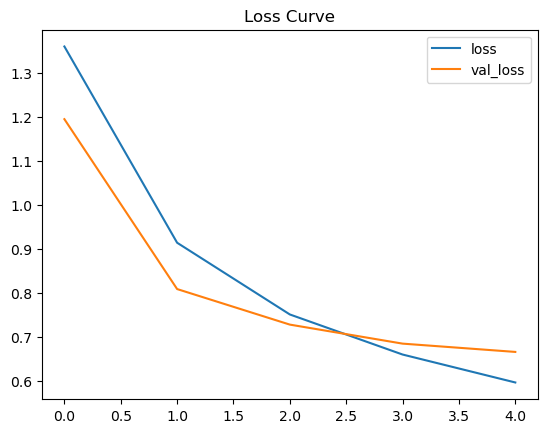

In [44]:
pd.DataFrame(train_metrics.history)[['loss','val_loss']].plot(title = 'Loss Curve')

<Axes: title={'center': 'Accuracy Curve'}>

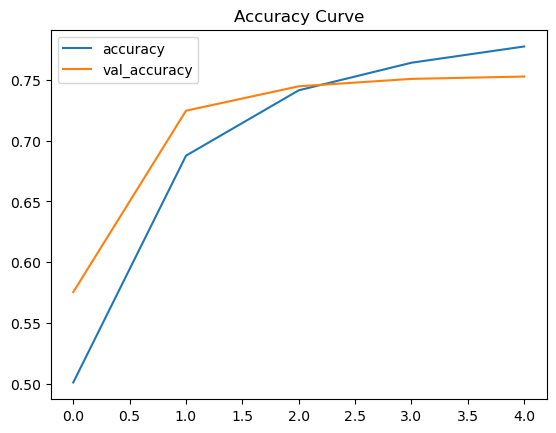

In [45]:
pd.DataFrame(train_metrics.history)[['accuracy','val_accuracy']].plot(title = 'Accuracy Curve')

In [46]:
for i in range(10):
 print(X_test[i], Y_test[i])

[      0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0   

In [47]:
file3 = 'Documents\Course\ProjectDL1\stacksample\Answers.csv'
df5 = pd.read_csv(file3, encoding='latin1')

In [48]:
df5

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."
...,...,...,...,...,...,...
2014511,40143247,333403.0,2016-10-19T23:42:35Z,40143190,0,"<p>Tanks to <a href=""http://stackoverflow.com/..."
2014512,40143322,642706.0,2016-10-19T23:50:35Z,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...
2014513,40143336,2239781.0,2016-10-19T23:52:08Z,40141860,0,<p>I came up with a very dirty workaround. Bef...
2014514,40143349,6934347.0,2016-10-19T23:54:02Z,40077010,0,<p>I solved my own problem defining the follow...


In [49]:
df6 = df5.drop(["Id"], axis = 1)
df6

,OwnerUserId,CreationDate,ParentId,Score,Body
0,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."
...,...,...,...,...,...
2014511,333403.0,2016-10-19T23:42:35Z,40143190,0,"<p>Tanks to <a href=""http://stackoverflow.com/..."
2014512,642706.0,2016-10-19T23:50:35Z,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...
2014513,2239781.0,2016-10-19T23:52:08Z,40141860,0,<p>I came up with a very dirty workaround. Bef...
2014514,6934347.0,2016-10-19T23:54:02Z,40077010,0,<p>I solved my own problem defining the follow...


In [50]:
df6 = df6.rename (columns = {'ParentId':'Id'})
df6

,OwnerUserId,CreationDate,Id,Score,Body
0,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."
...,...,...,...,...,...
2014511,333403.0,2016-10-19T23:42:35Z,40143190,0,"<p>Tanks to <a href=""http://stackoverflow.com/..."
2014512,642706.0,2016-10-19T23:50:35Z,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...
2014513,2239781.0,2016-10-19T23:52:08Z,40141860,0,<p>I came up with a very dirty workaround. Bef...
2014514,6934347.0,2016-10-19T23:54:02Z,40077010,0,<p>I solved my own problem defining the follow...


In [51]:
df2_filtered

,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#
...,...,...
3750974,40143150,javascript
3750981,40143190,python
3750984,40143210,php
3750987,40143340,android


In [52]:
df6_Tags_frame = pd.merge(df6, df2_filtered, on=['Id'], how = 'inner')
df6_Tags_frame

,OwnerUserId,CreationDate,Id,Score,Body,Tag
0,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur...",c#
1,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article...",c#
2,100.0,2008-08-02T04:18:15Z,260,6,<p>You might be able to use IronRuby for that....,c#
3,119.0,2008-08-02T06:16:23Z,260,5,"<P>You could use any of the DLR languages, whi...",c#
4,541.0,2008-08-06T16:28:19Z,260,5,<p>If you don't want to use the DLR you can <a...,c#
...,...,...,...,...,...,...
1393735,2745495.0,2016-10-19T23:31:15Z,40121390,0,"<p><a href=""https://developer.android.com/refe...",android
1393736,259769.0,2016-10-19T23:32:38Z,40142580,1,<p>I don't understand how having this code wil...,c#
1393737,1491895.0,2016-10-19T23:38:17Z,40143190,5,<p>Use a here-doc:</p>\n\n<pre><code>result=$(...,python
1393738,333403.0,2016-10-19T23:42:35Z,40143190,0,"<p>Tanks to <a href=""http://stackoverflow.com/...",python


In [53]:
new_merged_frame = pd.concat([merged_frame, df6_Tags_frame], axis = 0)
new_merged_frame

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c#
1,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,c++
2,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...,c#
3,930,245.0,2008-08-04T00:47:25Z,NaN,28,How do I connect to a database and loop over a...,<p>What's the simplest way to connect and quer...,c#
4,1010,67.0,2008-08-04T03:59:42Z,NaN,14,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...,c#
...,...,...,...,...,...,...,...,...
1393735,40121390,2745495.0,2016-10-19T23:31:15Z,NaN,0,NaN,"<p><a href=""https://developer.android.com/refe...",android
1393736,40142580,259769.0,2016-10-19T23:32:38Z,NaN,1,NaN,<p>I don't understand how having this code wil...,c#
1393737,40143190,1491895.0,2016-10-19T23:38:17Z,NaN,5,NaN,<p>Use a here-doc:</p>\n\n<pre><code>result=$(...,python
1393738,40143190,333403.0,2016-10-19T23:42:35Z,NaN,0,NaN,"<p>Tanks to <a href=""http://stackoverflow.com/...",python


In [54]:
new_merged_frame.columns

Index(['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title',
       'Body', 'Tag'],
      dtype='object')

In [55]:
new_data = new_merged_frame[['Body','Tag']]
new_data = new_data.dropna()
new_data.drop_duplicates()
new_data

,Body,Tag
0,<p>I have a little game written in C#. It uses...,c#
1,<p>I am working on a collection of classes use...,c++
2,<p>I would like the version property of my app...,c#
3,<p>What's the simplest way to connect and quer...,c#
4,<p>I need to grab the base64-encoded represent...,c#
...,...,...
1393735,"<p><a href=""https://developer.android.com/refe...",android
1393736,<p>I don't understand how having this code wil...,c#
1393737,<p>Use a here-doc:</p>\n\n<pre><code>result=$(...,python
1393738,"<p>Tanks to <a href=""http://stackoverflow.com/...",python


In [56]:
new_data.Body = new_data.Body.str.strip('<p>')
new_data.Body = new_data.Body.str.strip('</p>')

In [57]:
new_data = new_data.reset_index(drop=True)

new_data['Body'] = new_data['Body'].apply(clean_text)

In [58]:
new_data.head(10)

,Body,Tag
0,little game written c# uses database backend h...,c#
1,working collection classes used video playback...,c++
2,would like version property application increm...,c#
3,whats simplest way connect query database set ...,c#
4,need grab base64encoded representation viewsta...,c#
5,im looking way delete file locked another proc...,c#
6,getting back bit net fewyears using fulltime w...,c#
7,currently use datatable get results database u...,c#
8,disable codeautocomplete code major browsers s...,html
9,lets say argb color pprecodecolor argb colorfr...,c#


In [59]:
new_data['Count']=new_data['Body'].str.len()
new_data

,Body,Tag,Count
0,little game written c# uses database backend h...,c#,806
1,working collection classes used video playback...,c++,657
2,would like version property application increm...,c#,543
3,whats simplest way connect query database set ...,c#,58
4,need grab base64encoded representation viewsta...,c#,418
...,...,...,...
2220474,hrefhttps developerandroidcom reference androi...,android,276
2220475,dont understand code help pprecodestringjoin e...,c#,444
2220476,use heredoc pprecoderesult python lt lt eofimp...,python,92
2220477,tanks hrefhttp stackoverflowcom 37222377 33340...,python,304


In [60]:
sent_lens = []
for sent in new_data['Body']:
    sent_lens.append(len(word_tokenize(sent)))

In [61]:
min(sent_lens)

1

In [62]:
max(sent_lens)

10703

In [63]:
max_len = 500

In [64]:
tok = Tokenizer(char_level = False, split = ' ')
tok.fit_on_texts(new_data['Body'])
tok.index_word

{1: 'code',
 2: 'lt',
 3: 'gt',
 4: 'p',
 5: '0',
 6: 'new',
 7: 'function',
 8: '1',
 9: 'string',
 10: 'use',
 11: 'return',
 12: 'hrefhttp',
 13: 'using',
 14: 'var',
 15: 'get',
 16: 'public',
 17: 'data',
 18: 'id',
 19: 'like',
 20: 'pre',
 21: 'class',
 22: 'file',
 23: 'int',
 24: 'div',
 25: 'pprecode',
 26: 'name',
 27: 'value',
 28: 'want',
 29: '2',
 30: 'strong',
 31: 'amp',
 32: 'need',
 33: 'void',
 34: 'divgt',
 35: 'would',
 36: 'array',
 37: 'error',
 38: 'one',
 39: 'input',
 40: 'set',
 41: 'method',
 42: 'im',
 43: 'object',
 44: 'user',
 45: 'null',
 46: 'tdgt',
 47: 'way',
 48: 'text',
 49: 'true',
 50: 'else',
 51: 'page',
 52: 'pprecodelt',
 53: 'image',
 54: 'try',
 55: 'add',
 56: 'php',
 57: 'e',
 58: 'c',
 59: 'type',
 60: 'html',
 61: 'problem',
 62: 'first',
 63: '3',
 64: 'work',
 65: 'button',
 66: 'time',
 67: 'url',
 68: 'list',
 69: 'x',
 70: 'ppi',
 71: 'false',
 72: 'dont',
 73: 'import',
 74: 'view',
 75: 'click',
 76: 'also',
 77: 'example',
 78:

In [65]:
sequences = tok.texts_to_sequences(new_data['Body'])

In [66]:
sequences_matrix = sequence.pad_sequences(sequences, maxlen = max_len)

In [67]:
sequences_matrix

array([[   0,    0,    0, ...,  790,  686,    4],
       [   0,    0,    0, ...,  187,  251,    4],
       [   0,    0,    0, ...,  113,   15, 6932],
       ...,
       [   0,    0,    0, ..., 6476,    1,   20],
       [   0,    0,    0, ...,  545,    1,   20],
       [   0,    0,    0, ...,   53,    1,   20]])

In [68]:
vocab_size = len(tok.index_word)
vocab_size

6846502

In [69]:
X = sequences_matrix
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2220479, 500)


In [70]:
Y = pd.get_dummies(new_data['Tag']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2220479, 10)


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1776383, 500) (1776383, 10)
(444096, 500) (444096, 10)


In [72]:
train_metrics_2 = model.fit(X_train, Y_train,
                    validation_data = (X_test,Y_test),
                    epochs = 5,
                    batch_size = 300,
                    validation_split=0.1)

Epoch 1/5
5922/5922 [==============================] - 735s 124ms/step - loss: 0.9351 - accuracy: 0.6673 - val_loss: 0.7600 - val_accuracy: 0.7268
Epoch 2/5
5922/5922 [==============================] - 730s 123ms/step - loss: 0.7275 - accuracy: 0.7362 - val_loss: 0.7403 - val_accuracy: 0.7302
Epoch 3/5
5922/5922 [==============================] - 733s 124ms/step - loss: 0.6801 - accuracy: 0.7478 - val_loss: 0.7447 - val_accuracy: 0.7289
Epoch 4/5
5922/5922 [==============================] - 734s 124ms/step - loss: 0.6422 - accuracy: 0.7570 - val_loss: 0.7645 - val_accuracy: 0.7245
Epoch 5/5
5922/5922 [==============================] - 729s 123ms/step - loss: 0.6082 - accuracy: 0.7648 - val_loss: 0.7945 - val_accuracy: 0.7210


<Axes: title={'center': 'Loss Curve'}>

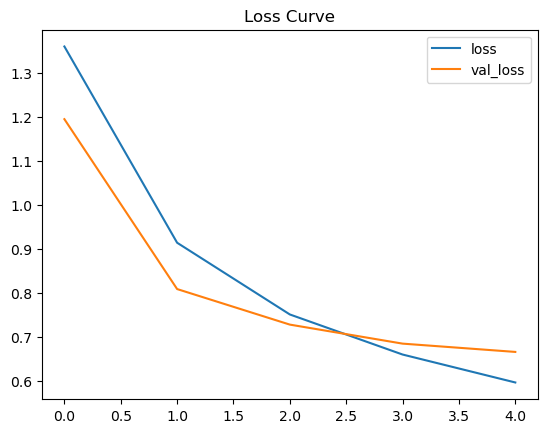

In [73]:
pd.DataFrame(train_metrics.history)[['loss','val_loss']].plot(title = 'Loss Curve')

<Axes: title={'center': 'Accuracy Curve'}>

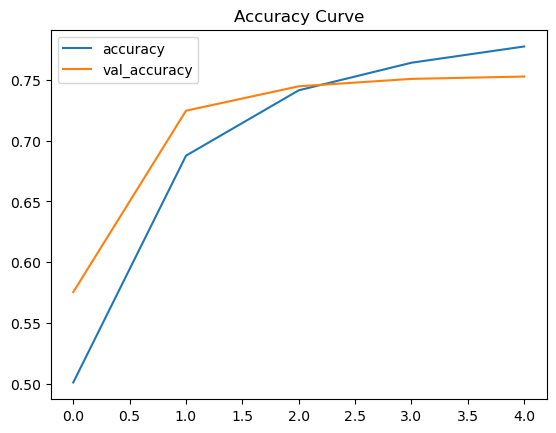

In [74]:
pd.DataFrame(train_metrics.history)[['accuracy','val_accuracy']].plot(title = 'Accuracy Curve')

In [75]:
for i in range(10):
 print(X_test[i], Y_test[i])

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

### Adding more data didn't appear to positively affect the accuracy